<a href="https://colab.research.google.com/github/MeeraVenugopal/CognoRise-Infotech/blob/main/Task_3_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 3

CINEMA TICKETS

• The Cinema Tickets dataset, covering eight months in 2018, offers sales history and screening details from various cinemas. Ideal for predictive modeling, it supports forecasting, screening optimization, and ROI improvement. With anonymized locations, it aids decisions on cast, crew, and project planning.

• Emphasizing time series analysis, it provides insights for Cinema Clustering, sales forecasts, and movie genre recommendations. Evolving with additional movie
data, it enhances strategic decision-making in the cinema industry.

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('/content/cinemaTicket_Ref.csv')
df

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4


In [85]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [86]:
df.tail()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
142519,1569,495,1320000,22,0,2,3.86,60000.0,22,569.948187,2018-11-04,11,4,4
142520,1569,474,1200000,15,0,1,65.22,80000.0,15,22.999080,2018-11-04,11,4,4
142521,1569,524,1060000,8,0,3,9.20,132500.0,8,86.956522,2018-11-04,11,4,4
142522,1569,529,600000,5,0,2,5.00,120000.0,5,100.000000,2018-11-04,11,4,4
142523,1569,486,250000,5,0,1,1.79,50000.0,5,279.329609,2018-11-04,11,4,4


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


In [88]:
df.isna().sum()

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,125
ticket_price,0
ticket_use,0
capacity,125


In [89]:
df['capacity'] = df['capacity'].fillna(df['capacity'].mode()[0])
df['occu_perc'] = df['occu_perc'].fillna(df['occu_perc'].mode()[0])

df.isna().sum()

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,0
ticket_price,0
ticket_use,0
capacity,0


In [90]:
df.dtypes

,0
film_code,int64
cinema_code,int64
total_sales,int64
tickets_sold,int64
tickets_out,int64
show_time,int64
occu_perc,float64
ticket_price,float64
ticket_use,int64
capacity,float64


In [91]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

,0
film_code,int64
cinema_code,int64
total_sales,int64
tickets_sold,int64
tickets_out,int64
show_time,int64
occu_perc,float64
ticket_price,float64
ticket_use,int64
capacity,float64


<Axes: >

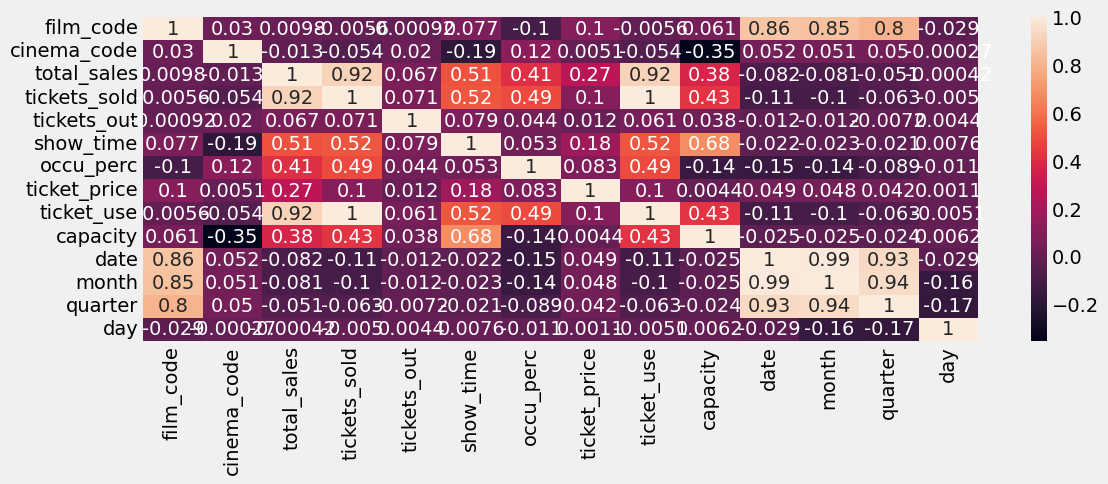

In [92]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Total of Sale')

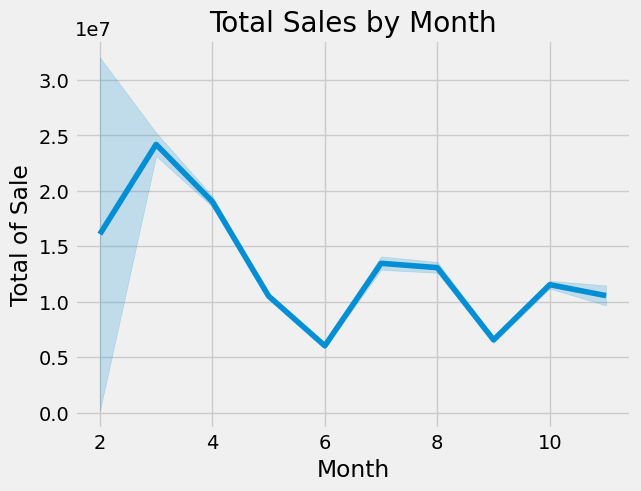

In [93]:
sns.lineplot(x=df['month'],y=df['total_sales'])

plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Total of Sale")

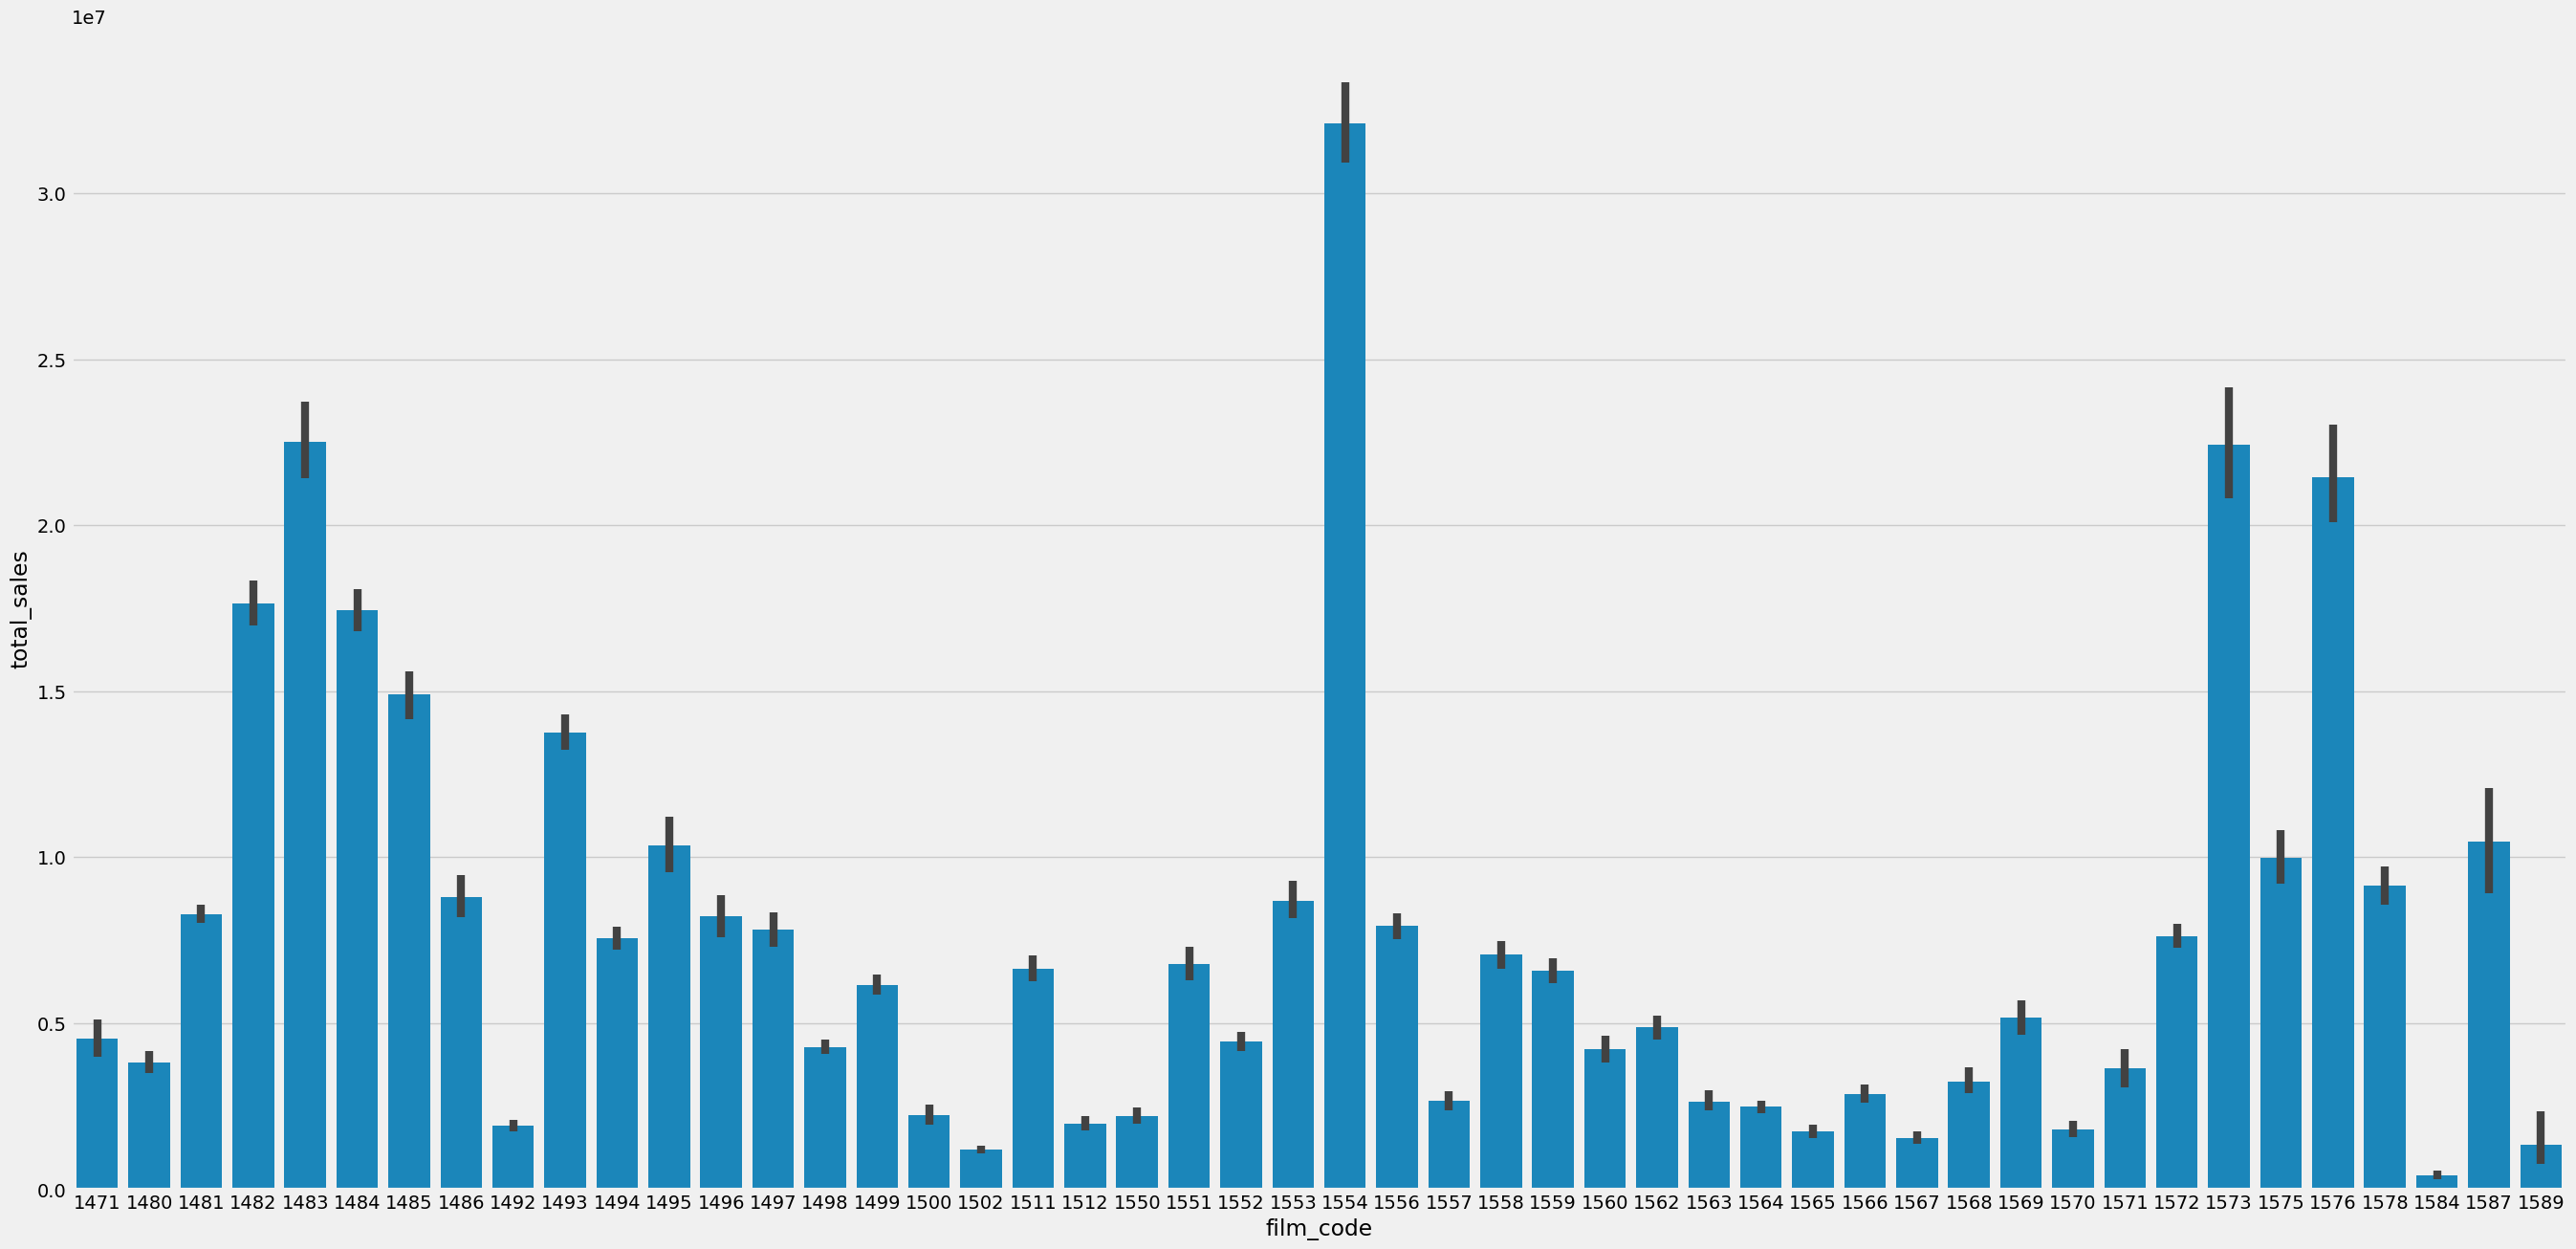

In [94]:
plt.figure(figsize=(30,15))
sns.barplot(x=df['film_code'],y=df['total_sales'])
plt.show()

Text(0, 0.5, 'Passengers')

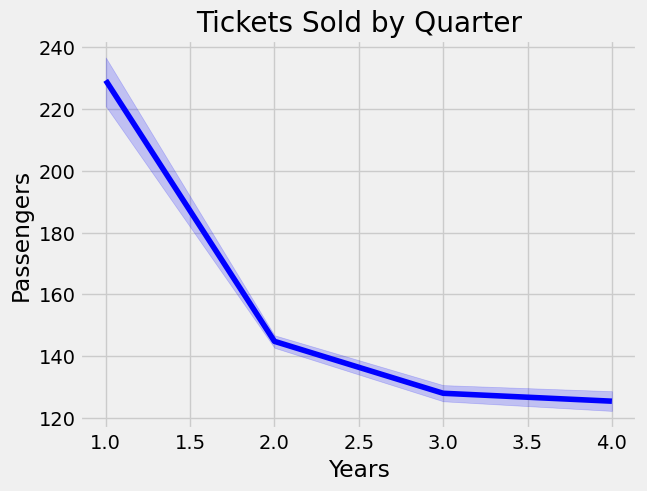

In [95]:
sns.lineplot(data=df, x="quarter", y="tickets_sold",color="b")
plt.title("Tickets Sold by Quarter")
plt.xlabel("Years")
plt.ylabel("Passengers")

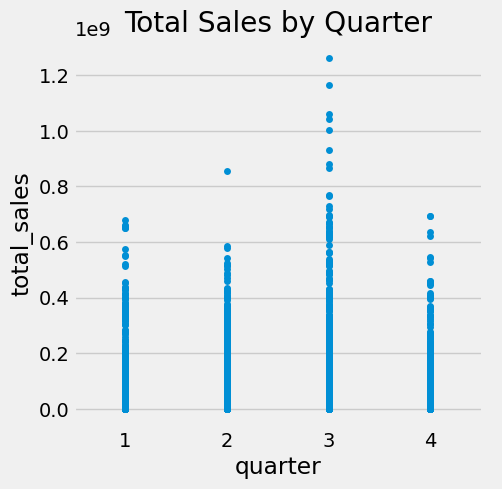

In [96]:
sns.catplot(x="quarter", y="total_sales", data=df,jitter=False)
plt.title("Total Sales by Quarter")
plt.show()

<Axes: xlabel='cinema_code'>

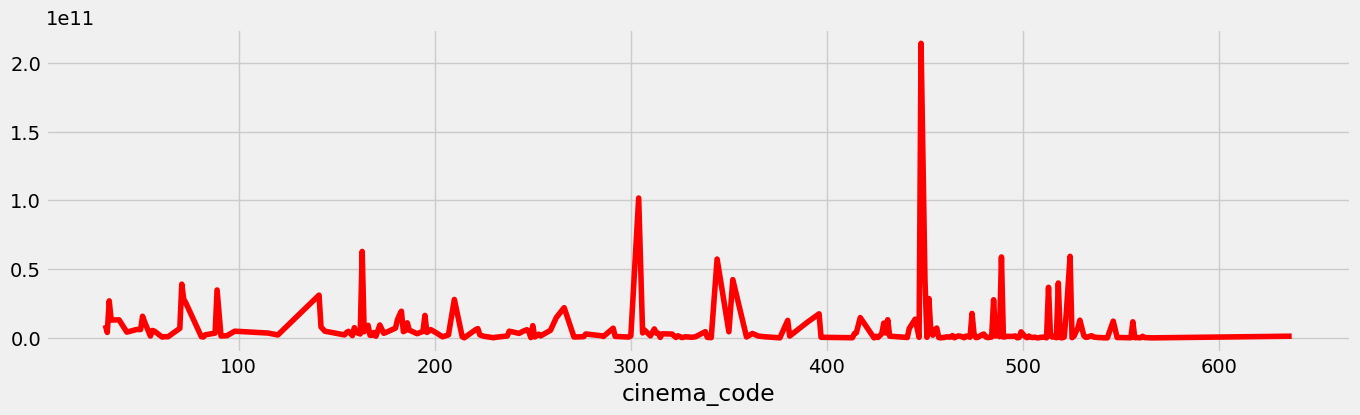

In [97]:
plt.style.use('fivethirtyeight')
df.groupby('cinema_code')['total_sales'].sum().plot(figsize=(15, 4), color='red')

In [98]:
from sklearn.model_selection import train_test_split
X = df[['tickets_sold','occu_perc',
             'capacity', 'show_time','ticket_price','ticket_use']]
y = np.log10(df['total_sales'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

In [99]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

In [100]:
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [101]:
y_pred = reg.predict(x_test)

In [102]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.29841235830728835
MSE: 0.14479455507278394
RMSE: 0.3805187972660272
R-Squared: 0.6813553269099824


In [103]:
df_actual_pre ={'Actual': y_test, 'Predicted': y_pred}
df1_actual_pre= pd.DataFrame(df_actual_pre)
df1_actual_pre.head(10)

,Actual,Predicted
128775,7.047664,6.935014
97762,7.112605,6.654216
100262,6.892095,6.492881
44385,7.002166,6.835684
15133,6.837588,6.454238
81325,5.602060,6.313364
4410,6.957128,6.585321
78019,7.555094,7.544237
109982,6.888460,6.443735
31959,7.049606,6.731248


In [104]:
from sklearn import neighbors
n_neighbors = 3

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, leaf_size=3)
    knn.fit(x_train, y_train)
    y_pred2 = knn.predict(x_test)

In [105]:
knn

KNeighborsRegressor(leaf_size=3, n_neighbors=3, weights='distance')

In [106]:
mae = metrics.mean_absolute_error(y_test, y_pred2)
mse = metrics.mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test,y_pred2)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.022179935191182734
MSE: 0.002766520604089992
RMSE: 0.052597724324251825
R-Squared: 0.9939118079886089


In [107]:
df_actual_pre2 ={'Actual': y_test, 'Predicted': y_pred2}
df1_actual_pre2= pd.DataFrame(df_actual_pre2)
df1_actual_pre2.head(10)

,Actual,Predicted
128775,7.047664,7.035922
97762,7.112605,7.086960
100262,6.892095,6.892095
44385,7.002166,6.994913
15133,6.837588,6.833839
81325,5.602060,5.602060
4410,6.957128,6.978822
78019,7.555094,7.538417
109982,6.888460,6.909214
31959,7.049606,7.047561
